In [22]:
import pytesseract
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [23]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    # print(im_data)
    # print(type(im_data))
    # print(im_data.shape)


    height, width  = im_data.shape[:2]
    
    figsize = width / float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    ax.axis('off')

    ax.imshow(im_data, cmap='gray')

    plt.show()
    pass

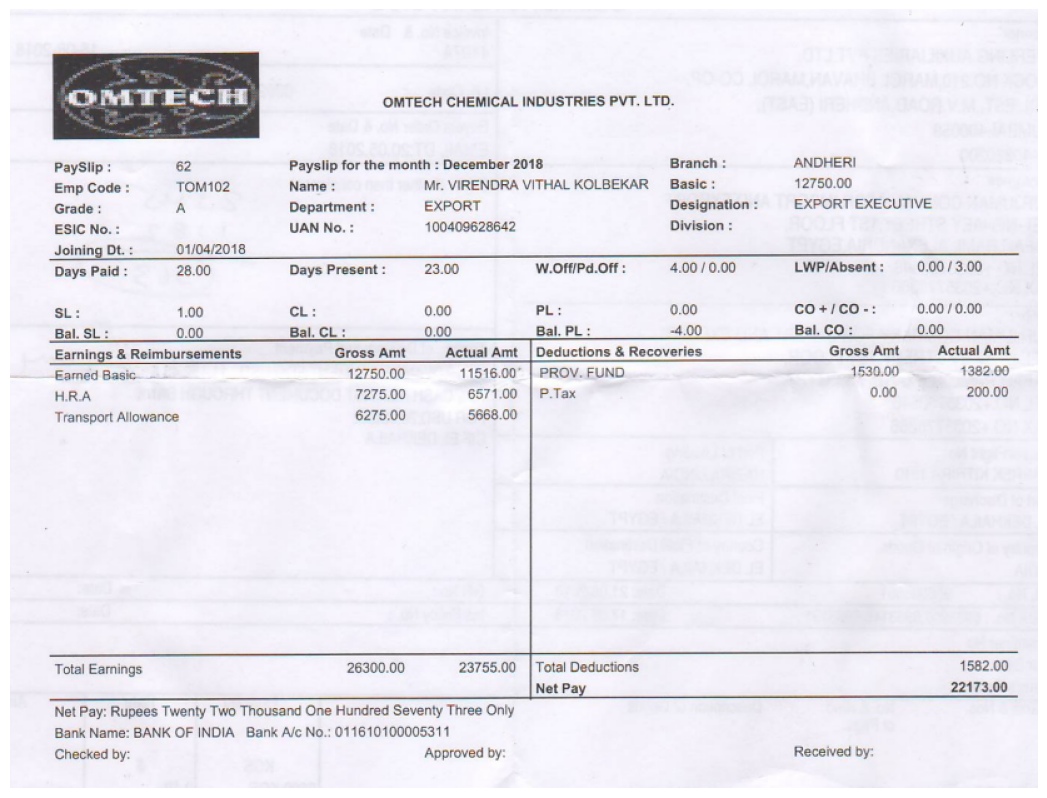

In [24]:
path = "../Images/1.png"
img = cv2.imread(path)
display(path)

In [25]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

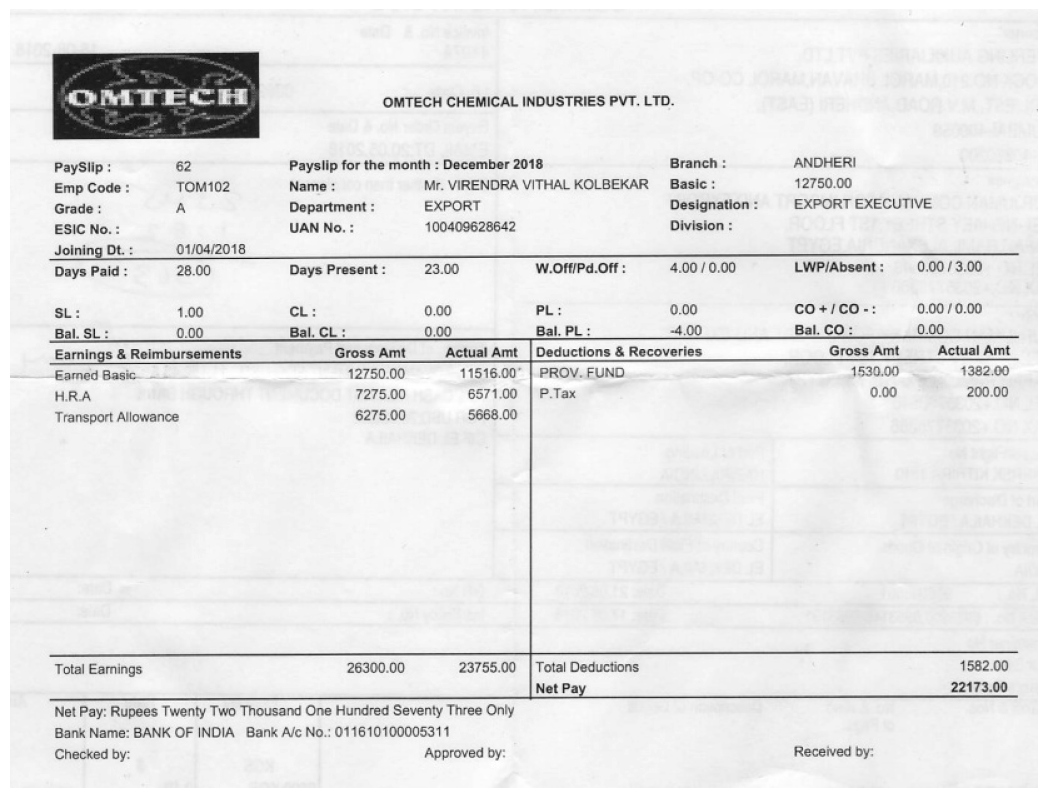

In [26]:
gray_img = grayscale(img)
cv2.imwrite("../temp/gray.jpg", gray_img)
display("../temp/gray.jpg")

BW image


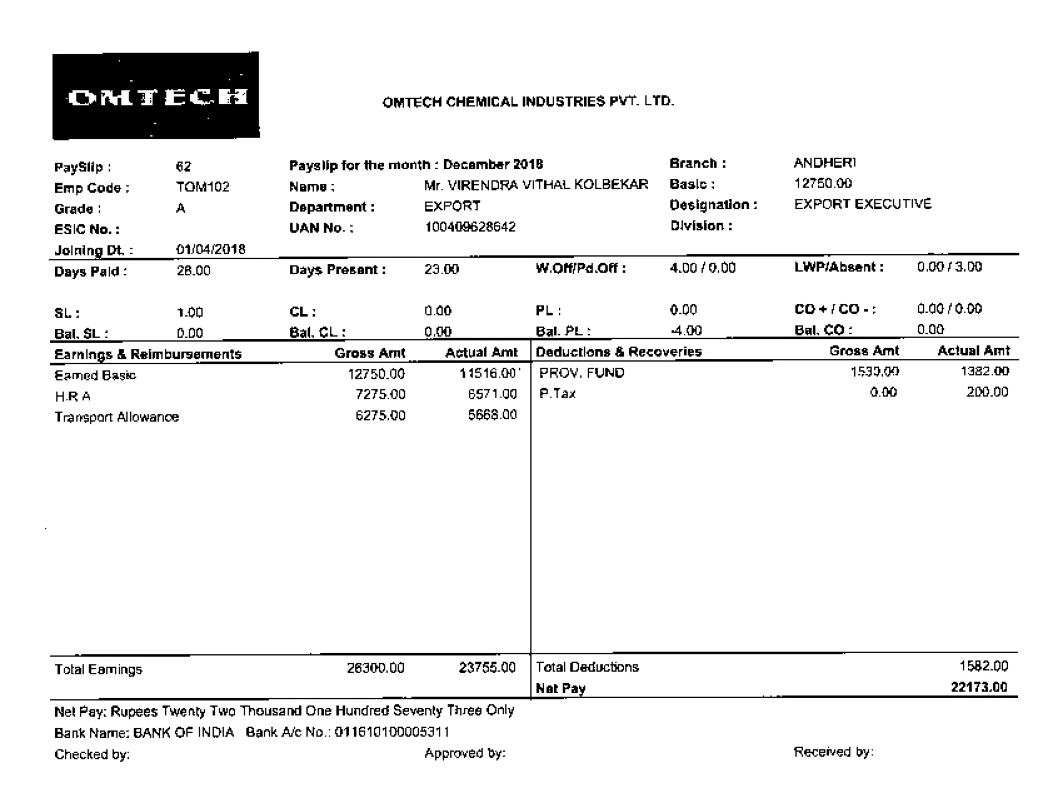

In [30]:
# blur = cv2.GaussianBlur(gray_img, (5,5), 0)
# cv2.imshow("img", blur)
# cv2.waitKey(0)
# thres,im_bw = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


thres,im_bw = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# thres, im_bw = cv2.threshold(gray_img, 100, 230, cv2.THRESH_BINARY)
cv2.imwrite("../temp/bw_img.jpg", im_bw)
# cv2.imwrite("temp/thresh.jpg", thres)
# print("Thresh image")
# display("temp/thresh.png")
print("BW image")
display("../temp/bw_img.jpg")

In [38]:
import img_2_txt
txt = img_2_txt.img_to_txt(gray_img)
print(txt)

OMPECE ‘OMTECH CHEMICAL INDUSTRIES PVT. LTD.

PaySlip 2 Payslip for the month : December 2018 Branel ANDHERI

EmpCode:  TOM102 Name Mr. VIRENORA VITHAL KOLBEKAR Basic: 1270.00

Grade A Department : EXPORT Designation: EXPORT EXECUTIVE

ESIC No. UAN No. : 100409628642 Division :

Joining Dt. o1v042018

Days Paid = 28.00 Days Present: 23.00 WoftiPdof: —_ 4.00/0.00 LWP/Absent: —_0.00/3.00

si 1.00 cL: 0.00 PL 0.00 co+ico 0.00/0.00

Bal. SL: 0.00 Bal. CL: 0.00 Bal. PL: 4.00 Bal. CO: 0.00

Earnings & Reimbursements Gross Amt Actual Amt_[Deductions & Recoveries Gross Amt Actual Amt

‘Eamed Basic 12750.00 11516.00" | PROV. FUND. 4530.00 1382.00

HRA 7275.00 6571.00 | P-Tax 0.00 200.00

Transport Allowance 6275.00 5668.00

Total Earnings 2630.00 723785.00 | Total Deductions 1582.00
Net Pa 2173.00

‘Net Pay: Rupees Twenty Two Thousand One Hundred Seventy Three Only
Bank Name: BANK OF INDIA. Bank Alc No. 011610100005311
Checked by: Approved by: Received by:



In [32]:
import sys
sys.path.append('../OCR2')
from OCR2 import bounding_box

bb = bounding_box.draw_from_path("temp/bw_img.jpg")
cv2.imwrite("temp/bb.jpg", bb)
display("temp/bb.jpg")

ModuleNotFoundError: No module named 'OCR2'

In [ ]:
#Incomplete code
#-----------------------------------------------------------------------------------
import numpy as np

def getSkewAngle(cvImage) -> float:
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle

def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, 1.0 * angle)

Types of Grayscaling

In [19]:
copy = img.copy()
(row, col) = copy.shape[0:2]
  
for i in range(row):
    for j in range(col):
        copy[i, j] = sum(copy[i, j]) * 0.33

cv2.imshow("Grey", gray_img)
cv2.imshow('Pixel avg', copy)
cv2.waitKey(0)
  
# Window shown waits for any key pressing event
cv2.destroyAllWindows()